### Importing Required libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import random
import pandas as pd
import cv2
import skimage
import skimage.segmentation
import seaborn
plt.style.use('ggplot')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D
from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.optimizers import SDG,  RMSProp, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [23]:
labels = ['Parasitized', 'Uninfected']
IMAGE_SIZE = 128

In [13]:
def get_malaria_data(data_dir):
    X = []
    y = []
    for label in labels:
        folder_path = os.path.join(data_dir, label)
        class_num = labels.index(label)  # 0 for Parasitized, 1 for Uninfected
        for img_name in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, img_name)
                img = cv2.imread(img_path)
                if img is None:
                    print(f"⚠️ Skipped unreadable file: {img_path}")
                    continue
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                X.append(img_resized)
                y.append(class_num)
            except Exception as e:
                print(f"⚠️ Error reading {img_name}: {e}")
    
    X = np.array(X)
    y = np.array(y)
    return X, y


In [14]:
data_dir = 'Malaria_Dataset/'
get_malaria_data(data_dir)

(array([[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         ...,
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]],
 
 
        [[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0

### Data Preparation

In [ ]:
folder = 'Malaria_Dataset/Parasitized/'
count = 1


for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "P_" + str(count) + ".jpg"
    os.rename(source, destination)
    count +=1
print('All files are renamed in the Paratized Directory')

In [ ]:
folder = 'Malaria_Dataset/Uninfected/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "U_" + str(count) + ".jpg"
    os.rename(source, destination)
    count +=1
print('All files are renamed in the Uninfected Directory')

## Exploratory Data Analysis (EDA)

In [7]:
list_paratized = os.listdir('Malaria_Dataset/Parasitized')
number_file_paratized = len(list_paratized)
print(number_file_paratized)

list_uninfected = os.listdir('Malaria_Dataset/Uninfected')
number_file_uninfected = len(list_uninfected)
print(number_file_uninfected)

3064
3065


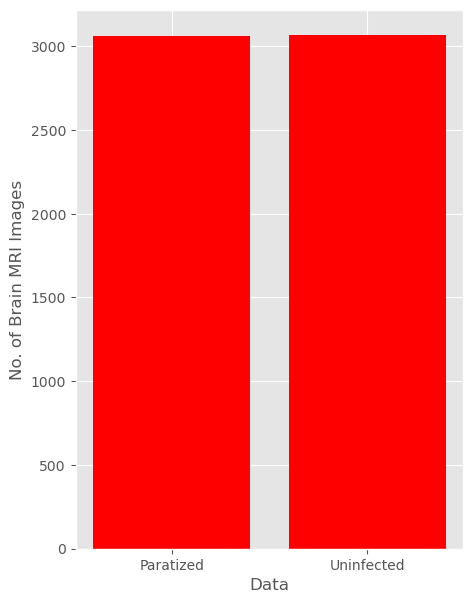

In [8]:
data = {'Paratized': number_file_paratized, 'Uninfected': number_file_uninfected}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize = (5,7))
plt.bar(typex, values, color= 'red')
plt.xlabel('Data')
plt.ylabel('No. of Brain MRI Images')
plt.show()


##### Optional::

Parasitized = 'Malaria_Dataset/Parasitized'

def timing(second_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60)/60)
    s  = sec_elapsed % 60

    return f"{h}:{m}:{s}"
    

def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range = 10,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    brightness_range = (0.3, 0.1),
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nears')
                    
                    
    for filename in os.listdir(file_dir):
        image = cv2.IMREAD(file_dir + "/" + filename)
        image.reshape((1, ) + image.shape)
        save_prefix = 'aug_' + filename[-4]
        i = 0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir, save_prefix, save_format='.jpg'):
        i += 1
        if i > n_generated_samples:
            break
        else:
            continue



import time
start_time = time.time
paratized_path = Malaria_dataset/Paratized
uninfected_path = Malaria_dataset/Uninfected

augmented_data_path = 'augmented_data/'

augmented_data(file_dir= paratized_path, n_generated_samples = 6, save_to_dir = augmented_data_path + "Paratized" )
augmented_data(file_dir= uninfected_path, n_generated_samples = 9, save_to_dir = augmented_data_path + "Uninfected" )


end_time = time.time()

excution_time = end_time - start_time
print(excution_time)



Confirm if the data set is balance 


def data_summary(main_path):
    Paratized_path  = 'augmented_data/Paratized'
    Uninfected_path  = 'augmented_data/Uninfected'

    m_pos = len(os.listdir(Uninfected_path))
    m_neg = len(os.listdir(Uninfected_path))

    m = (m_pos + m_neg)
    pos_per  = (m_pos * 100) / m
    neg_per  = (m_neg * 100) / m

    print(f"Number of Sample:{m}")
    print(f"{m_pos} Number of Positive sample in percentage {pos_per}%")
    print(f"{m_neg} Number of Positive sample in percentage {neg_per}%")

data_summary(augmented_data)



Generate plot for it using the format below:
        data = {'Paratized': number_file_paratized, 'Uninfected': number_file_uninfected}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize = (5,7))
plt.bar(typex, values, color= 'red')
plt.xlabel('Data')
plt.ylabel('No. of Brain MRI Images')
plt.show()


### Data Preprocessing

In [21]:
#Convert BGR2GRAY
#GaussianBlur
#Threshold
#Erode
#Dilate
#Find Contour

In [74]:
import cv2
import numpy as np
import imutils

def crop_malarial(image, plot=False):
    if image is None or image.size == 0:
        return image

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # find contours
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    if not cnts:
        # No contour found → return original
        return image

    c = max(cnts, key=cv2.contourArea)

    # Extract extreme points safely
    extLeft  = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop   = tuple(c[c[:, :, 1].argmin()][0])
    extBot   = tuple(c[c[:, :, 1].argmax()][0])

    # Ensure valid crop bounds
    y1, y2 = max(0, extTop[1]), min(image.shape[0], extBot[1])
    x1, x2 = max(0, extLeft[0]), min(image.shape[1], extRight[0])

    # If invalid crop, return original
    if (y2 - y1) < 2 or (x2 - x1) < 2:
        return image

    new_image = image[y1:y2, x1:x2]
    return new_image


img = cv2.imread(r'Malaria_Dataset/Parasitized/P_1.jpg')
crop_brain_tumor(img , True)

img_Unifected = cv2.imread('Malaria_Dataset/Unifected/U_1.jpg')
crop_brain_tumor(img_Unifected, True)

In [12]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle

def load_data(dir_list, image_size):
    X, y = [], []
    image_width, image_height = image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            path = os.path.join(directory, filename)
            image = cv2.imread(path)

            if image is None or image.size == 0:
                print(f"⚠️ Skipping unreadable file: {path}")
                continue

            try:
                # No cropping for malaria dataset
                image = cv2.resize(image, (image_width, image_height), interpolation=cv2.INTER_CUBIC)
                image = image / 255.0
                X.append(image)

                if "Parasitized" in directory:
                    y.append(1)
                else:
                    y.append(0)
            except Exception as e:
                print(f"⚠️ Error processing {path}: {e}")
                continue

    X, y = np.array(X), np.array(y)

    if len(X) == 0:
        print("🚫 No valid images loaded. Check dataset paths or image formats.")
        return np.array([]), np.array([])

    X, y = shuffle(X, y, random_state=42)

    print(f"✅ Loaded {len(X)} images successfully")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    return X, y


from sklearn.utils import shuffle

def load_data(dir_list, image_size):
    X = []
    y = []
    image_width, image_height = image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            images = cv2.imread(directory + "/" + filename)
            if images is None:
                print(f"⚠️ Skipping unreadable file")
                continue  # skip this file
                try:
                    images = crop_brain_tumor(images_path, plot=False)
                    images = cv2.resize(images, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
                    images = images/255.0
        
                    X.append(images)
                    if directory[-3:] =="Parasitized":
                        y.append(1)
                    else:
                        y.append(0)
                except Exception as e:
                    print(f"Error processing {path}:{e}")
                    continue
                    
    X = np.array(X)
    y = np.array(y)

    X,y = shuffle(X,y)
    print(f"Number of examples is : {len(X)}")
    print(f"Number of examples is : {len(y)}")
    print(f"X Shape is : {X.shape}")
    print(f"y Shape is : {y.shape}")

    return X,y

In [13]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from imutils import grab_contours

def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = grab_contours(cnts)
    if not cnts:
        return image

    c = max(cnts, key=cv2.contourArea)
    extLeft  = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop   = tuple(c[c[:,:,1].argmin()][1])
    extBot   = tuple(c[c[:,:,1].argmax()][1])

    return image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]


def load_data(dir_list, image_size):
    X, y = [], []
    image_width, image_height = image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            path = os.path.join(directory, filename)
            images = cv2.imread(path)
            if images is None:
                print(f"⚠️ Skipping unreadable file: {path}")
                continue

            try:
                images = crop_brain_tumor(images, plot=False)
                images = cv2.resize(images, (image_width, image_height), interpolation=cv2.INTER_CUBIC)
                images = images / 255.0

                X.append(images)
                # Assign labels based on folder name
                if 'Parasitized' in directory:
                    y.append(1)
                else:
                    y.append(0)
            except Exception as e:
                print(f"⚠️ Error processing {path}: {e}")
                continue

    X, y = np.array(X), np.array(y)
    X, y = shuffle(X, y)
    print(f"✅ Loaded {len(X)} images.")
    print(f"X Shape: {X.shape}, y Shape: {y.shape}")
    return X, y


In [ ]:
Malaria_path = 'Malaria_Dataset/'

Parasitized_path = os.path.join(Malaria_path, 'Parasitized')
Unifected_path = os.path.join(Malaria_path, 'Uninfected')


IMAGE_WIDTH, IMAGE_HEIGHT = (240, 240)

X,y = load_data([Parasitized_path, Unifected_path], (IMAGE_WIDTH, IMAGE_HEIGHT))


In [ ]:
## plot 50 samples

### Data Splitting

##### There is need for Creation of directory for data train_test_split operation as follows;

- Train
- Test
- Validation


In [61]:
if not os.path.isdir("updated_malaria_dataset"):
    base_dir = "updated_malaria_dataset"
    os.mkdir(base_dir)


if not os.path.isdir("updated_malaria_dataset/train"):
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
if not os.path.isdir("updated_malaria_dataset/test"):
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)
if not os.path.isdir("updated_malaria_dataset/valid"):
    valid_dir = os.path.join(base_dir, 'valid')
    os.mkdir(valid_dir)


In [62]:
if not os.path.isdir("updated_malaria_dataset/train/Parasitized"):
    Parasitized_train_dir = os.path.join(train_dir, 'Parasitized')
    os.mkdir(Parasitized_train_dir)
if not os.path.isdir("updated_malaria_dataset/test/Parasitized"):
    Parasitized_test_dir = os.path.join(test_dir, 'Parasitized')
    os.mkdir(Parasitized_test_dir)
if not os.path.isdir("updated_malaria_dataset/valid/Parasitized"):
    Parasitized_valid_dir = os.path.join(valid_dir, 'Parasitized')
    os.mkdir(Parasitized_valid_dir)

In [63]:
if not os.path.isdir("updated_malaria_dataset/train/Uninfected"):
    Uninfected_train_dir = os.path.join(train_dir, 'Uninfected')
    os.mkdir(Uninfected_train_dir)
if not os.path.isdir("updated_malaria_dataset/test/Uninfected"):
    Uninfected_test_dir = os.path.join(test_dir, 'Uninfected')
    os.mkdir(Uninfected_test_dir)
if not os.path.isdir("updated_malaria_dataset/valid/Uninfected"):
    Uninfected_valid_dir = os.path.join(valid_dir, 'Uninfected')
    os.mkdir(Uninfected_valid_dir)

In [64]:
Original_dataset_parasitized = os.path.join('Malaria_Dataset', 'Parasitized/')
Original_dataset_uninfected = os.path.join('Malaria_Dataset', 'Uninfected/')

#### Loading Data into the Repository

In [ ]:
files = os.listdir('Malaria_Dataset/Parasitized/')
fnames = []

for i in range(0, 2145):
    fnames.append(files[i])
for fname in fnames:
    source = os.path.join(Original_dataset_parasitized, fname)
    destination = os.path.join(Parasitized_train_dir, fname)
    shutil.copyfile(source, destination)

In [66]:
files = os.listdir('Malaria_Dataset/Parasitized/')
fnames = []

for i in range(2145, 2758):
    fnames.append(files[i])
for fname in fnames:
    source = os.path.join(Original_dataset_parasitized, fname)
    destination = os.path.join(Parasitized_test_dir, fname)
    shutil.copyfile(source, destination)

In [67]:
files = os.listdir('Malaria_Dataset/Parasitized/')
fnames = []

for i in range(2758, 3064):
    fnames.append(files[i])
for fname in fnames:
    source = os.path.join(Original_dataset_parasitized, fname)
    destination = os.path.join(Parasitized_valid_dir, fname)
    shutil.copyfile(source, destination)

In [ ]:
files = os.listdir('Malaria_Dataset/Uninfected/')
fnames = []

for i in range(0, 2145):
    fnames.append(files[i])
for fname in fnames:
    source = os.path.join(Original_dataset_uninfected, fname)
    destination = os.path.join(Uninfected_train_dir, fname)
    shutil.copyfile(source, destination)



In [69]:
files = os.listdir('Malaria_Dataset/Uninfected/')
fnames = []

for i in range(2145, 2758):
    fnames.append(files[i])
for fname in fnames:
    source = os.path.join(Original_dataset_uninfected, fname)
    destination = os.path.join(Uninfected_test_dir, fname)
    shutil.copyfile(source, destination)



In [70]:
files = os.listdir('Malaria_Dataset/Uninfected/')
fnames = []

for i in range(2758, 3064):
    fnames.append(files[i])
for fname in fnames:
    source = os.path.join(Original_dataset_uninfected, fname)
    destination = os.path.join(Uninfected_valid_dir, fname)
    shutil.copyfile(source, destination)



### Building the Model 

In [35]:
train_data_gen = ImageDataGenerator(rescale = 1./255.0,
                   horizontal_flip=0.4,
                   vertical_flip=0.4,
                   rotation_range=40,
                   shear_range=0.2,
                   width_shift_range=0.4,
                   height_shift_range=0.4,
                   fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1.0/255.0)
valid_data_gen = ImageDataGenerator(rescale=1.0/255.0)

In [36]:
train_generator = train_data_gen.flow_from_directory('updated_malaria_dataset/train/', batch_size=32, target_size=(240, 240), class_mode = 'categorical', shuffle=True, seed = 42, color_mode = 'rgb')

Found 5209 images belonging to 2 classes.


In [37]:
test_generator = test_data_gen.flow_from_directory('updated_malaria_dataset/test/', batch_size=32, target_size=(240, 240), class_mode = 'categorical', shuffle=True, seed = 42, color_mode = 'rgb')


Found 613 images belonging to 2 classes.


In [38]:
valid_generator = valid_data_gen.flow_from_directory('updated_malaria_dataset/valid/', batch_size=32, target_size=(240, 240), class_mode = 'categorical', shuffle=True, seed = 42, color_mode = 'rgb')


Found 306 images belonging to 2 classes.


## Checking the class levels
This enesure that we have a y_train and y_test availability

In [39]:
class_labels = train_generator.class_indices
class_name = {value: key for (key, value) in class_labels.items()}
class_name

{0: 'Parasitized', 1: 'Uninfected'}

In [44]:
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights='imagenet')


for layers in base_model.layers:
    layers.trainable=False
x = base_model.output
flat = Flatten()(x)

class_1= Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2= Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

model_1 = Model(base_model.input, output)
## Unfreezing for gettig the right accuracy
model_1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [53]:
### Callbacks
filepath = 'model.keras'
es = EarlyStopping(monitor='val_loss', verbose = 1, mode= 'min', patience = 4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode = 'auto', save_freq = 'epoch')
lrr = ReduceLROnPlateau(
    monitor='val_accuracy',   # ✅ correct
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=0.00001,
    mode='max'                # ✅ optional but recommended for clarity
)

## Weight is needed for Unfreezinf and finetuning
 

In [66]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)


In [74]:
model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',   # ✅ correct spelling
    metrics=['accuracy']
)


In [ ]:
folder1 = 'Malaria_Dataset/Parasitized'
folder2 = 'Malaria_Dataset/Uninfected'

for filename in os.listdir(folder1):
    img = cv2.imread(folder1 + filename)
    crop_malaria()

In [ ]:
def crop_malaria(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = grab_contours(cnts)
    if not cnts:
        return image

    c = max(cnts, key=cv2.contourArea)
    extLeft  = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop   = tuple(c[c[:,:,1].argmin()][1])
    extBot   = tuple(c[c[:,:,1].argmax()][1])

    return image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]


def load_data(dir_list, image_size):
    X, y = [], []
    image_width, image_height = image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            path = os.path.join(directory, filename)
            images = cv2.imread(path)
            if images is None:
                print(f"⚠️ Skipping unreadable file: {path}")
                continue

            try:
                images = crop_brain_tumor(images, plot=False)
                images = cv2.resize(images, (image_width, image_height), interpolation=cv2.INTER_CUBIC)
                images = images / 255.0

                X.append(images)
                # Assign labels based on folder name
                if 'Parasitized' in directory:
                    y.append(1)
                else:
                    y.append(0)
            except Exception as e:
                print(f"⚠️ Error processing {path}: {e}")
                continue

    X, y = np.array(X), np.array(y)
    X, y = shuffle(X, y)
    print(f" Loaded {len(X)} images.")
    print(f"X Shape: {X.shape}, \n y Shape: {y.shape}")
    return X, y


In [ ]:
history_1 = model_1.fit(train_generator, steps_per_epoch = 10, epochs = 5, callbacks = [es, cp, lrr], validation_data = valid_generator)